# Stage 1: Data Process
---

---
## Contents
1. [Background](#Background)
    1. [Goal](#Goal)
    2. [Data Description](#Data_Description)
1. [Data transformation](#Data_transformation)
    1. Filter support data records for only 2015,2016 and 2017
    1. [Group by Average](#Group_by_Average ) 
    2. Outer Join support datasets based on the `Location` and `year`
    3. Left Join (Return all rows from Main data) based on the `Location` and `year`
2. [Data Cleaning](#Data_Cleaning)
3. [Data Analysis](#Data_Analysis)


## Background

### Data Description
**Main datasets**: Happiness level rank in 2015, 2016, and 2017

**Support datasets**: 
- Body Health: alcohol_consumption, overweight_population
- Mental Health: suicide_statistics
- Economy: disposable_income
- Environment: air_pollution
- Education: adult_education
- Jobs: avg_annual_hours, employment_ratios
- Society: tourismGDP
---

In [115]:
import requests
import json
import pandas as pd
import re
import math
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', 50) # show all columns
pd.set_option('display.max_rows', 500) # show all rows
from matplotlib.colors import LogNorm

### Load data

In [83]:
## Load world hapiness data
happiness_2015 = pd.read_csv("../data/world-happiness/2015.csv")
happiness_2016 = pd.read_csv("../data/world-happiness/2016.csv")
happiness_2017 = pd.read_csv("../data/world-happiness/2017.csv")


In [84]:
happiness_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [85]:
len(happiness_2015)

158

In [117]:
### Load economy data
disposable_income = pd.read_csv("../data/economy/household-disposable-income.csv")

### education data
adult_education = pd.read_csv("../data/education/adult-education-level.csv")

### Load environment data
air_pollution = pd.read_csv("../data/environment/air-pollution-exposure.csv")

### Load health data
alcohol_consumption = pd.read_csv("../data/body_health/alcohol-consumption.csv")
overweight_population = pd.read_csv("../data/body_health/overweight-population.csv")

### Load mental health data
suicide_statistics = pd.read_csv('../data/mental_health/who_suicide_statistics.csv')

### Load jobs data
avg_annual_hours = pd.read_csv("../data/jobs/average-annual-hours-worked-per-worker.csv")
employment_ratios = pd.read_csv("../data/jobs/employment-population-ratios.csv")

### Load society data
tourismGDP = pd.read_csv("../data/society/tourism-GDP.csv")
#elder_population = filter_year(years, elder_population)
#yong_population = filter_year(years, yong_population)

In [87]:
#### Rename to unify column names
avg_annual_hours = avg_annual_hours.rename(columns = { 
                                  "COUNTRY":"LOCATION"}) 
employment_ratios = employment_ratios.rename(columns = { 
                                  "COUNTRY":"LOCATION"}) 

## Data transformation
1. Filter support data records for only 2015,2016 and 2017
2. Group by Aberage, to simplier data: the country in the given year has only one value (using average of observation)
2. Outer Join support datasets based on the `Location` and `year`
3. Left Join (Return all rows from Main data) based on the `Location` and `year`


### Filter data
We only need 2015,2016 and 2017 observations

In [88]:
"""
Filter the records in 2015, 2016 and 2017 only
Parameters:
---------------------------------------------
    years: a list
    data: the input dataset
    
Return:
---------------------------------------------
    the filer new dataset with records only in 2015, 2016 and 2017

"""


def filter_year(years, data):
    data = data[data.TIME.isin(years)]
    if len(data) == 0:
        print("useless data")
    return data

In [89]:
years = [2015, 2016, 2017]

disposable_income = filter_year(years, disposable_income)
adult_education = filter_year(years, adult_education)
air_pollution = filter_year(years, air_pollution)
alcohol_consumption = filter_year(years, alcohol_consumption)
overweight_population = filter_year(years, overweight_population)
avg_annual_hours = filter_year(years, avg_annual_hours)
employment_ratios = filter_year(years, employment_ratios)
tourismGDP = filter_year(years, tourismGDP)

### Group by Average 
To simplier data: the country in the given year has only one value (using average of observation)

In [90]:
disposable_income = disposable_income.groupby(['LOCATION', 'TIME'])["Value"].mean()
adult_education = adult_education.groupby(['LOCATION', 'TIME'])["Value"].mean()
air_pollution = air_pollution.groupby(['LOCATION', 'TIME'])["Value"].mean()
alcohol_consumption = alcohol_consumption.groupby(['LOCATION', 'TIME'])["Value"].mean()
overweight_population = overweight_population.groupby(['LOCATION', 'TIME'])["Value"].mean()
avg_annual_hours = avg_annual_hours.groupby(['LOCATION', 'TIME'])["Value"].mean()
employment_ratios = employment_ratios.groupby(['LOCATION', 'TIME'])["Value"].mean()
tourismGDP = tourismGDP.groupby(['LOCATION', 'TIME'])["Value"].mean()

### Outer Join support datasets

In [91]:
new_df = pd.merge(disposable_income, adult_education,  
                  how='outer', 
                  left_on=['LOCATION','TIME'], 
                  right_on = ['LOCATION','TIME'],
                  suffixes=('_disposable_income', '_adult_education'))

new_df2 = pd.merge(alcohol_consumption, air_pollution,  
                  how='outer', 
                  left_on=['LOCATION','TIME'], 
                  right_on = ['LOCATION','TIME'],
                  suffixes=('_alcohol_consumption', '_air_pollution'))


In [92]:
new_df3 = pd.merge(overweight_population, avg_annual_hours,  
                  how='outer', 
                  left_on=['LOCATION','TIME'], 
                  right_on = ['LOCATION','TIME'],
                  suffixes=('_overweight_population', '_avg_annual_hours'))


In [93]:
new_df4 = pd.merge(employment_ratios, tourismGDP,  
                  how='outer', 
                  left_on=['LOCATION','TIME'], 
                  right_on = ['LOCATION','TIME'],
                  suffixes=('_employment_ratios', '_tourismGDP'))

In [94]:
new_df.head()

Value_disposable_income  Value_adult_education
LOCATION TIME                                                
AUS      2015             18870.755186              36.866776
         2016             19330.376264              37.125749
         2017             19965.250210              37.427755
AUT      2015             17214.849710              38.475010
         2016             17827.860576              38.438368

In [95]:
final_data = pd.merge(new_df, new_df2,
                      left_on=['LOCATION','TIME'], 
                      right_on = ['LOCATION','TIME'],
                      how='outer')
final_data = pd.merge(final_data, new_df3,
                      left_on=['LOCATION','TIME'], 
                      right_on = ['LOCATION','TIME'],
                      how='outer')

final_data = pd.merge(final_data, new_df4,
                      left_on=['LOCATION','TIME'], 
                      right_on = ['LOCATION','TIME'],
                      how='outer')


In [96]:
final_data.head(10)

Value_disposable_income  Value_adult_education  \
LOCATION TIME                                                   
AUS      2015             18870.755186              36.866776   
         2016             19330.376264              37.125749   
         2017             19965.250210              37.427755   
AUT      2015             17214.849710              38.475010   
         2016             17827.860576              38.438368   
         2017             18083.452889              38.562258   
BEL      2015             16090.269085              35.622781   
         2016             16483.612491              35.741651   
         2017             16973.842661              36.227861   
CAN      2015             15924.453615              40.113281   

               Value_alcohol_consumption  Value_air_pollution  \
LOCATION TIME                                                   
AUS      2015                        9.7            18.279745   
         2016                        9.4            17.269865   
         2017                        NaN            17.252180   
AUT      2015                       11.6            53.312620   
         2016                       11.8            49.847440   
         2017                        NaN            49.862640   
BEL      2015                       10.4            55.055880   
         2016                        NaN            53.196105   
         2017                        NaN            53.314870   
CAN      2015                        8.0             4.056305   

               Value_overweight_population  Value_avg_annual_hours  \
LOCATION TIME                                                        
AUS      2015                          NaN                 1683.55   
         2016                          NaN                 1673.40   
         2017                        56.40                 1674.90   
AUT      2015                          NaN                 1460.00   
         2016                          NaN                 1472.00   
         2017                          NaN                 1471.50   
BEL      2015                          NaN                 1484.00   
         2016                          NaN                 1485.00   
         2017                          NaN                 1487.00   
CAN      2015                        58.25                 1715.00   

               Value_employment_ratios  Value_tourismGDP  
LOCATION TIME                                             
AUS      2015                45.803374              3.10  
         2016                45.835223              3.20  
         2017                46.161249               NaN  
AUT      2015                41.934248              7.00  
         2016                42.368314              7.10  
         2017                42.429347               NaN  
BEL      2015                38.465393               NaN  
         2016                36.845403               NaN  
         2017                37.100294               NaN  
CAN      2015                45.024064              1.99

In [97]:
len(final_data)

519

In [98]:
final_data.reset_index(inplace=True)  

In [103]:
len(final_data['LOCATION'].unique()) # number of countries

173

In [105]:
final_data.head(10)

,LOCATION,TIME,Value_disposable_income,Value_adult_education,Value_alcohol_consumption,Value_air_pollution,Value_overweight_population,Value_avg_annual_hours,Value_employment_ratios,Value_tourismGDP
0,AUS,2015,18870.755186,36.866776,9.7,18.279745,NaN,1683.55,45.803374,3.10
1,AUS,2016,19330.376264,37.125749,9.4,17.269865,NaN,1673.40,45.835223,3.20
2,AUS,2017,19965.250210,37.427755,NaN,17.252180,56.40,1674.90,46.161249,NaN
3,AUT,2015,17214.849710,38.475010,11.6,53.312620,NaN,1460.00,41.934248,7.00
4,AUT,2016,17827.860576,38.438368,11.8,49.847440,NaN,1472.00,42.368314,7.10
5,AUT,2017,18083.452889,38.562258,NaN,49.862640,NaN,1471.50,42.429347,NaN
6,BEL,2015,16090.269085,35.622781,10.4,55.055880,NaN,1484.00,38.465393,NaN
7,BEL,2016,16483.612491,35.741651,NaN,53.196105,NaN,1485.00,36.845403,NaN
8,BEL,2017,16973.842661,36.227861,NaN,53.314870,NaN,1487.00,37.100294,NaN
9,CAN,2015,15924.453615,40.113281,8.0,4.056305,58.25,1715.00,45.024064,1.99


## Data Cleaning

## Data Analysis

### Happiness

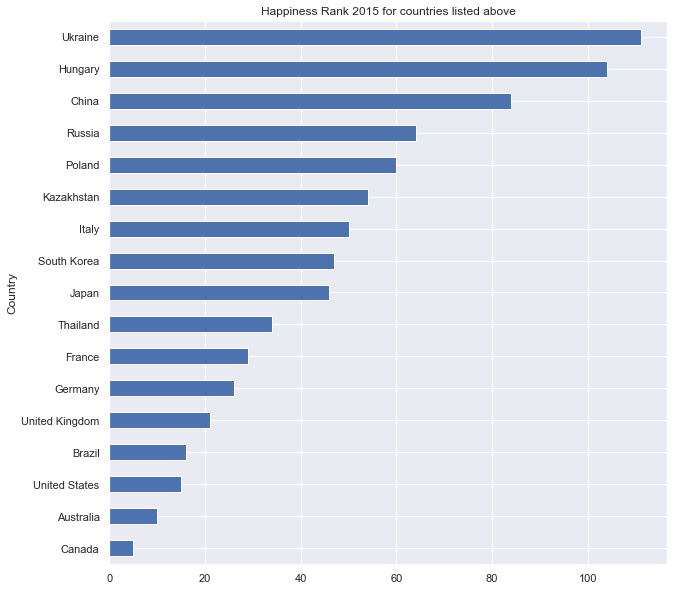

In [114]:
happiness_2015[happiness_2015.Country.str.contains("Russia")]
countries = ['China','Australia','Russia','United States','Japan','France','Ukraine','Germany','South Korea',
'Brazil','Poland','United Kingdom','Italy','Hungary','Thailand','Canada','Kazakhstan']
happiness_dr = happiness_2015[happiness_2015.Country.isin(countries)].drop('Region',axis=1).set_index('Country')
sns.set(rc={'figure.figsize':(10,10)})
happiness_dr['Happiness Rank'].plot(kind='barh', title='Happiness Rank 2015 for countries listed above')

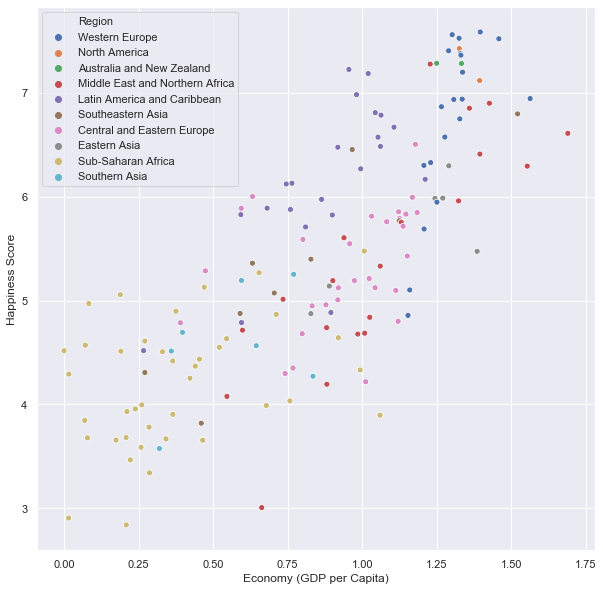

In [110]:
sns.set(rc={'figure.figsize':(10,10)})
#g = sns.FacetGrid(happiness, col="Region",  margin_titles=True, col_wrap=3)

#(g.map(plt.scatter, "Generosity","Happiness Score", edgecolor="w")).add_legend()
sns.scatterplot("Economy (GDP per Capita)","Happiness Score",hue='Region', data=happiness_2015)

### Suicide

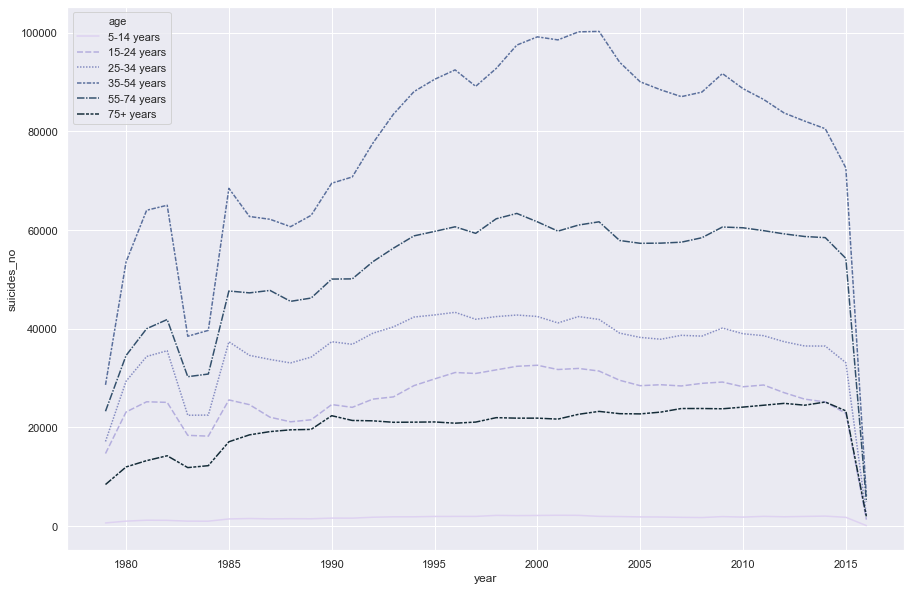

In [118]:
from matplotlib.colors import LogNorm
df = suicide_statistics.groupby(['year','age']).suicides_no.sum().reset_index()
df['age'] = df.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)